In [4]:
# --- Notebook Theme (codes from @vivek468 & @sonalisingh1411) ---
from IPython.core.display import display, HTML, Javascript

color_map = ['#8A0030', '#BA1141']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>💕💔 Heart Disease<span style="color: #000000"> EDA & Prediction 🔮</span></b><br><span style="color: #FF5C8A; font-size: 24px">with Various Machine Learning Models </span></h1>
<hr>


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>
<center>
    <img src="https://images.unsplash.com/photo-1628348070889-cb656235b4eb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80" alt="Heart Disease" width="80%">
</center>
<br>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Problems 🤔</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This dataset contains information about contains diagnoses of heart disease patients. Machine learning model is needed in order <mark><b>to determine whether a person has heart disease or not</b></mark>.</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Objectives of Notebook 📌</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>This notebook aims to:</b>
    <ul>
        <li> <mark><b>Perform dataset exploration</b></mark> using various types of data visualization.</li>
        <li> <mark><b>Build various ML models</b></mark> that can predict whether patients has heart disease or not.</li>
        <li> <mark><b>Export prediction & best model</b></mark> into text file.</li>
        <li> <mark><b>Perform prediction on new example data</b></mark> given.</li>
    </ul>
</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Machine Learning Modules 👨‍💻</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The <b>models</b> used in this notebook:
    <ol start="1">
        <li> <b>Logistic Regression</b>,</li>
        <li> <b>K-Nearest Neighbour (KNN)</b>,</li>
        <li> <b>Decision Tree</b>,</li>
        <li> <b>Random Forest</b>,</li>
        <li> <b>AdaBoost</b>,</li>
    </ol>
</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Description 🧾</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>14 variables</b></mark> in this dataset:
    <ul>
        <li> <b>9 categorical</b> variables, and</li>
        <li> <b>5 continuous</b> variables.</li>
    </ul>
</div>

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The following is the <b>structure of the dataset</b>.<br>
    
<table style="width: 100%">
<thead>
<tr>
<th style="text-align: center; font-weight: bold; font-size:14px;">Variable Name</th>
<th style="text-align: center; font-weight: bold; font-size:14px;">Description</th>
<th style="text-align: center; font-weight: bold; font-size:14px;">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Age</b></td>
<td>Patient Age <br> (in years)</td>
<td>63; 37; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Gender of patient <br> (0 = male; 1 = female)</td>
<td>1; 0; ...</td>
</tr>
<tr>
<td><b>cp</b></td>
<td>Chest pain type <br> (4 values: 0, 1, 2, 3)</td>
<td>3; 1; 2; ...</td>
</tr>
<tr>
<td><b>trestbps</b></td>
<td>resting blood pressure  <br> (in mm Hg)</td>
<td>145; 130; ...</td>
</tr>
<tr>
<td><b>chol</b></td>
<td>Serum cholestoral <br> (in mg/dl)</td>
<td>233; 250; ...</td>
</tr>
<tr>
<td><b>fbs</b></td>
<td>Fasting blood sugar > 120 mg/dl <br> (1 = true; 0 = false) </td>
<td>1; 0; ...</td>
</tr>
<tr>
<td><b>restecg</b></td>
<td>Resting electrocardiographic results <br> (values 0, 1, 2) </td>
<td>0; 1; ...</td>
</tr>
<tr>
<td><b>thalach</b></td>
<td>Maximum heart rate achieved </td>
<td>150; 187; ...</td>
</tr>
<tr>
<td><b>exang</b></td>
<td>Exercise induced angina <br> (1 = yes; 0 = no) </td>
<td>1; 0; ...</td>
</tr>
<tr>
<td><b>oldpeak</b></td>
<td>ST depression induced by exercise relative to rest</td>
<td>2.3; 3.5; ...</td>
</tr>
<tr>
<td><b>slope</b></td>
<td>The slope of the peak exercise ST segment<br> (values 0, 1, 2) </td>
<td>0; 2; ...</td>
</tr>
<tr>
<td><b>ca</b></td>
<td>number of major vessels (0-4) colored by flourosopy </td>
<td>0; 3; ...</td>
</tr>
<tr>
<td><b>thal</b></td>
<td>(3 = normal; 6 = fixed defect; 7 = reversable defect)</td>
<td>1; 3; ...</td>
</tr>
<tr>
<td><b>Target</b></td>
<td>Target column<br> (1 = Yes; 0 = No) </td>
<td>1; 0; ...</td>
</tr>
</tbody>
</table>
    
<hr>
<center>
    <b style="font-size: 20px";> <a href=""></a> </b>
    👉 <i>Source: <a href="https://linktr.ee/caesarmario_">linktr.ee/caesarmario_</a></i>
    </center>
<hr>
</div>

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [5]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Color Palettes 🎨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will create some <b>color palettes</b> that will be used in this notebook.
</div>

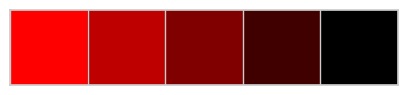

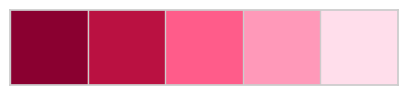

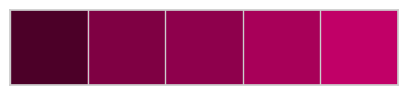

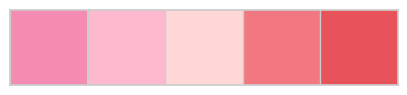

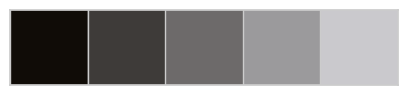

In [6]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [7]:
# --- Importing Dataset ---
df = pd.read_csv("heart.csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [8]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 303
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>14 columns</b></mark> with <mark><b>303 observations</b></mark>. Also, there are <mark><b>no null values</b></mark> in this dataset. The <b>details of each variables</b> also can be seen above.<br>
    👉 However, the <mark><b>data types for some columns are not matched</b></mark>. Below will <mark><b>fixed the data types for those column</b></mark> before analysis performed.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [9]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">5. | Initial Data Exploration 🔍</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before applying ML models.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1 | Categorical Variable 📊</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The first type of variable that will be explored is <b>categorical variable</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.1 | sex (Gender)</div>

*************************
.: Sex (Gender) Total :.
*************************


1    207
0     96
Name: sex, dtype: int64

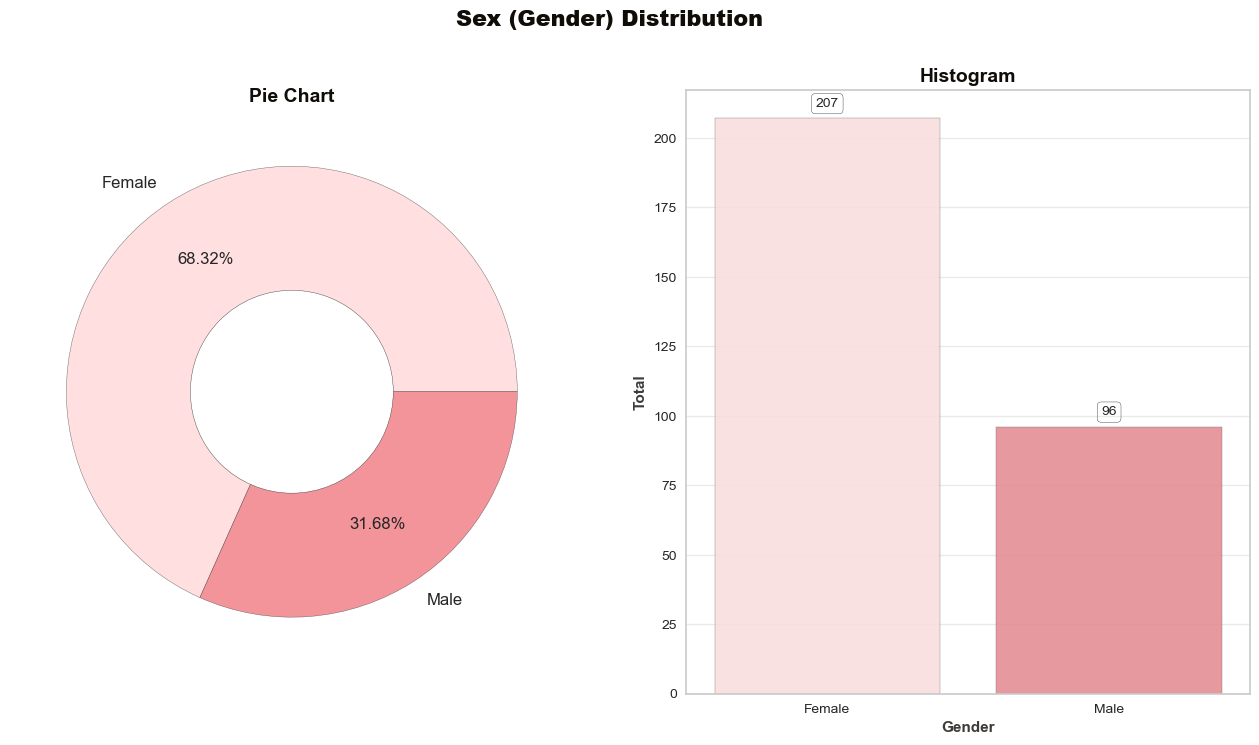

In [10]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The distribution of <mark><b>male patients are highest</b></mark> compared to female patients .
    </div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.2 | cp (Chest Pain Type)</div>

******************************
.: Chest Pain Type Total :.
******************************


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

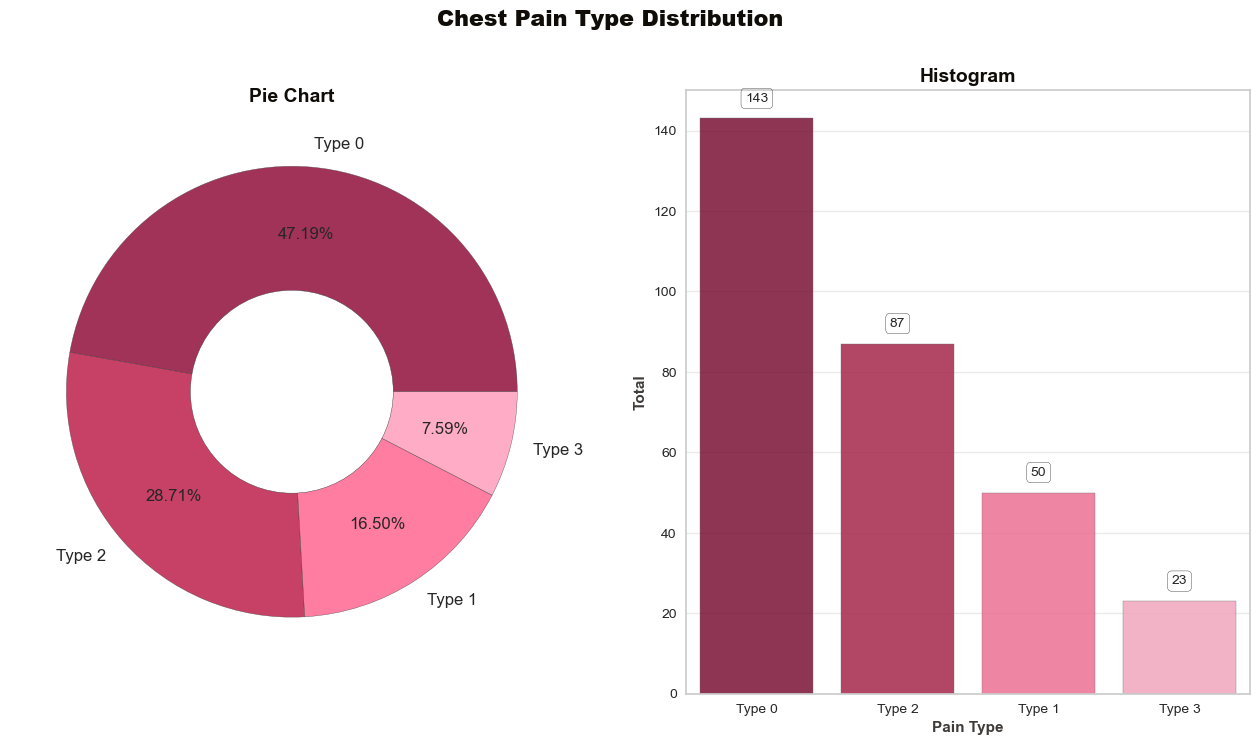

In [11]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='cp', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>Chest pain type 0 have the highest number</b></mark> compared to other types of chest pain.
    </div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.3 | fbs (Fasting Blood Sugar)</div>

********************************
.: Fasting Blood Sugar Total :.
********************************


0    258
1     45
Name: fbs, dtype: int64

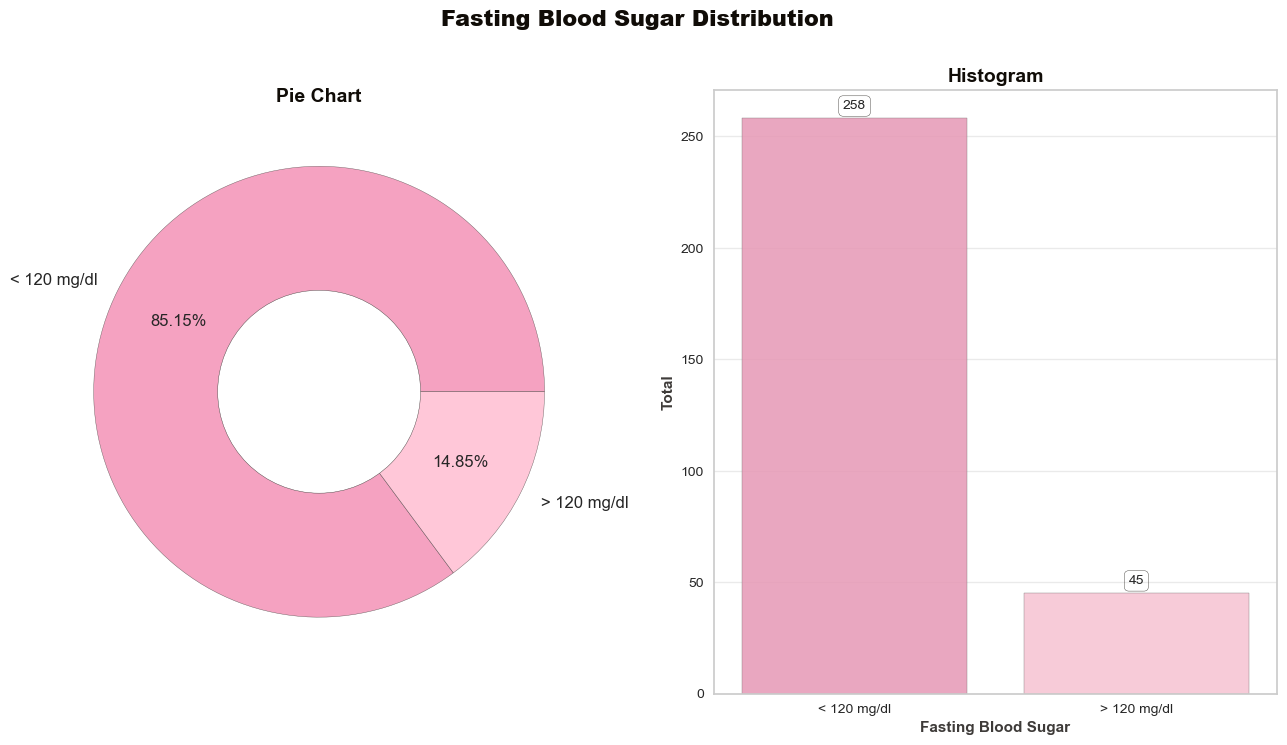

In [12]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['fbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='fbs', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that the number of <mark><b>patients with fasting blood sugar less than 120 mg/dl have the highest numbers</b></mark>. <br>
    </div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.4 | restecg (Resting Electrocardiographic Results)</div>

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    152
0    147
2      4
Name: restecg, dtype: int64

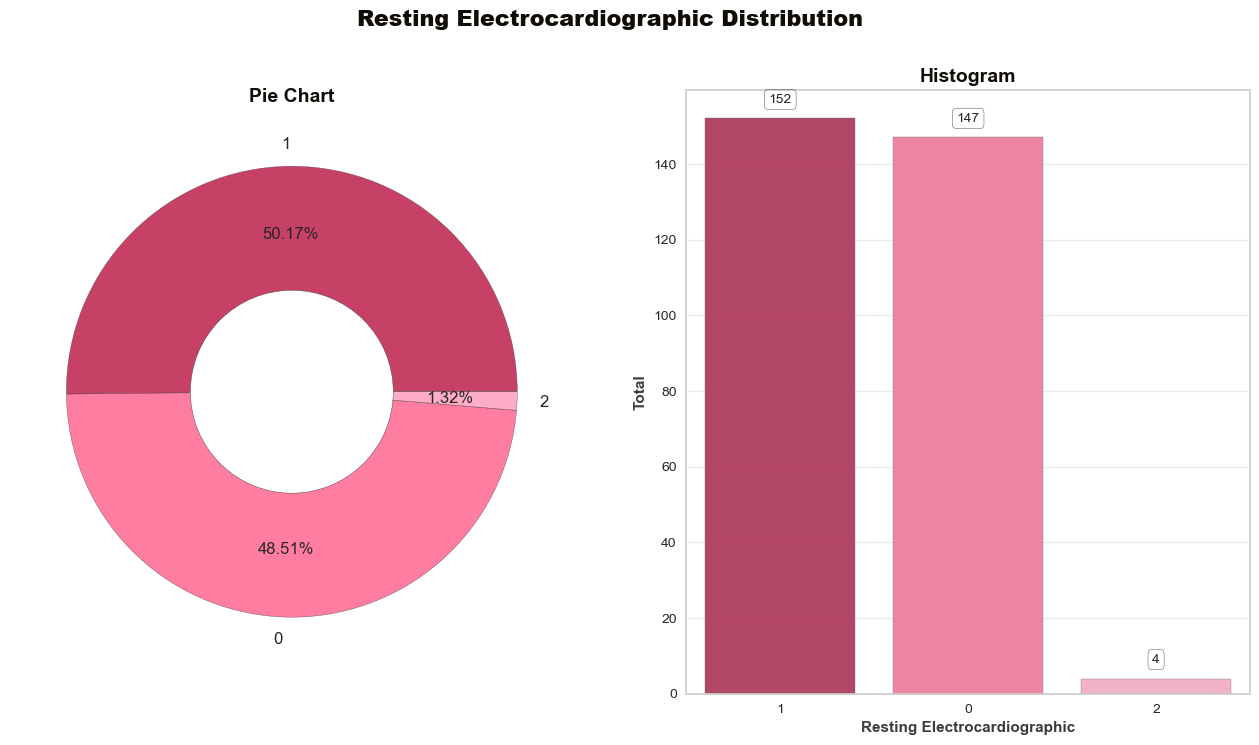

In [13]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='restecg', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Resting electrocardiographic with <b>results 1 and 0 has a higher distribution</b> than result 2. <br>
    👉 In addition, <mark><b>result 1 has the highest distribution</b></mark> compared to the other results.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.5 | exang (Exercise Induced Angina)</div>

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    204
1     99
Name: exang, dtype: int64

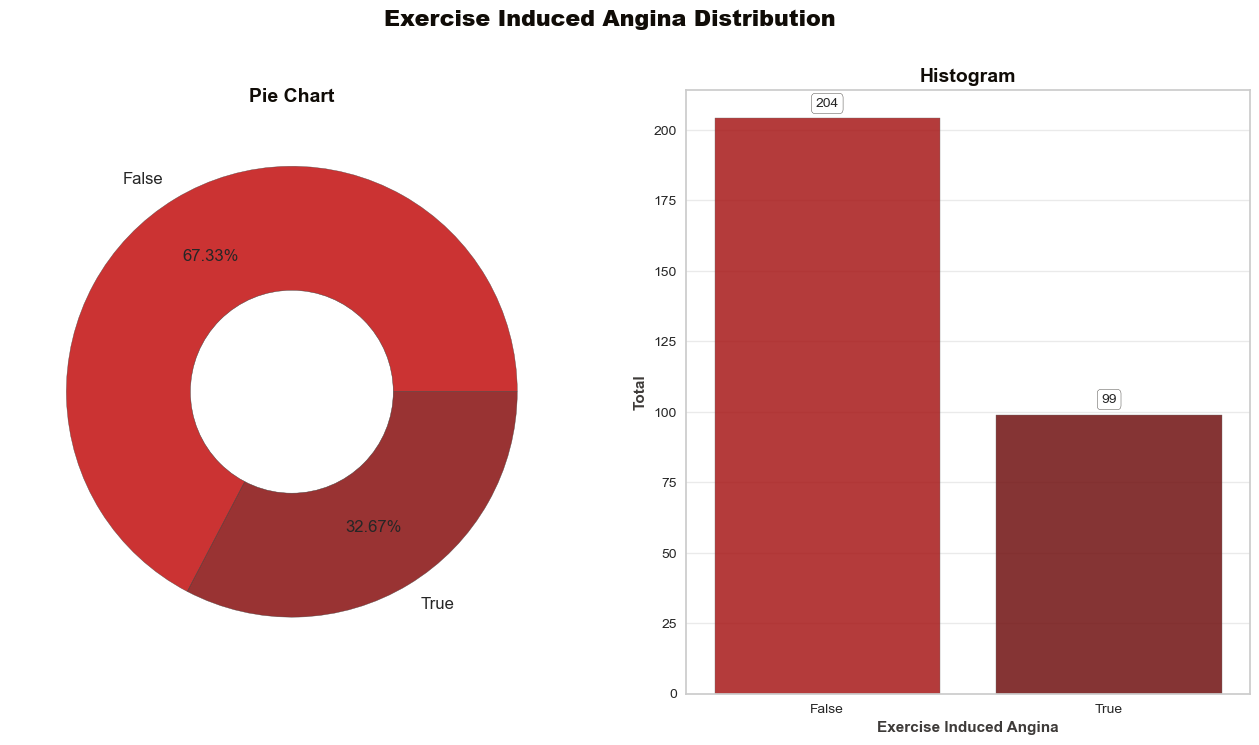

In [14]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>Patients with no exercise induced angina are the highest</b></mark> compared to patients with exercise induced angina.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.6 | slope (Slope of the Peak Exercise)</div>

********************
.: Slope Total :.
********************


2    142
1    140
0     21
Name: slope, dtype: int64

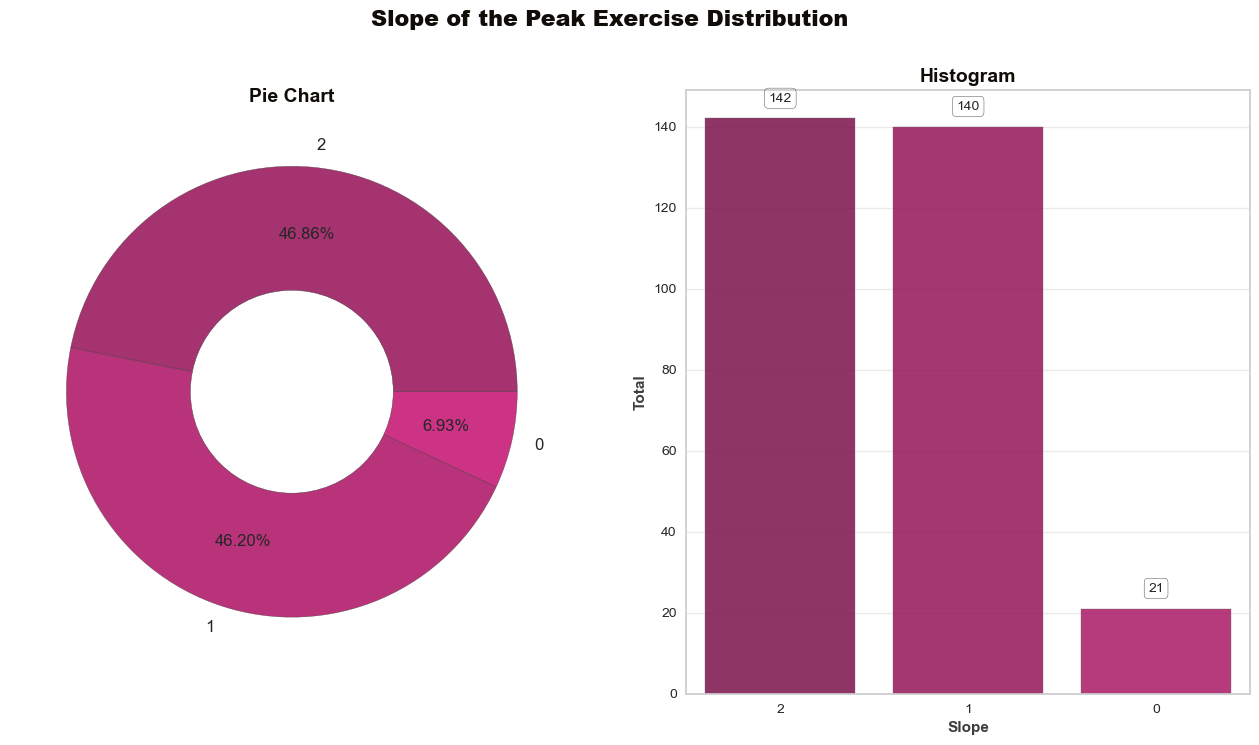

In [15]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The distribution of <b>slope 1 and 2 are almost the same</b>.<br>
    👉 Moreover, <mark><b>slope 2 has the highest distribution</b></mark> compared to others.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.7 | ca (Number of Major Vessels)</div>

****************************************
.: Number of Major Vessels Total :.
****************************************


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

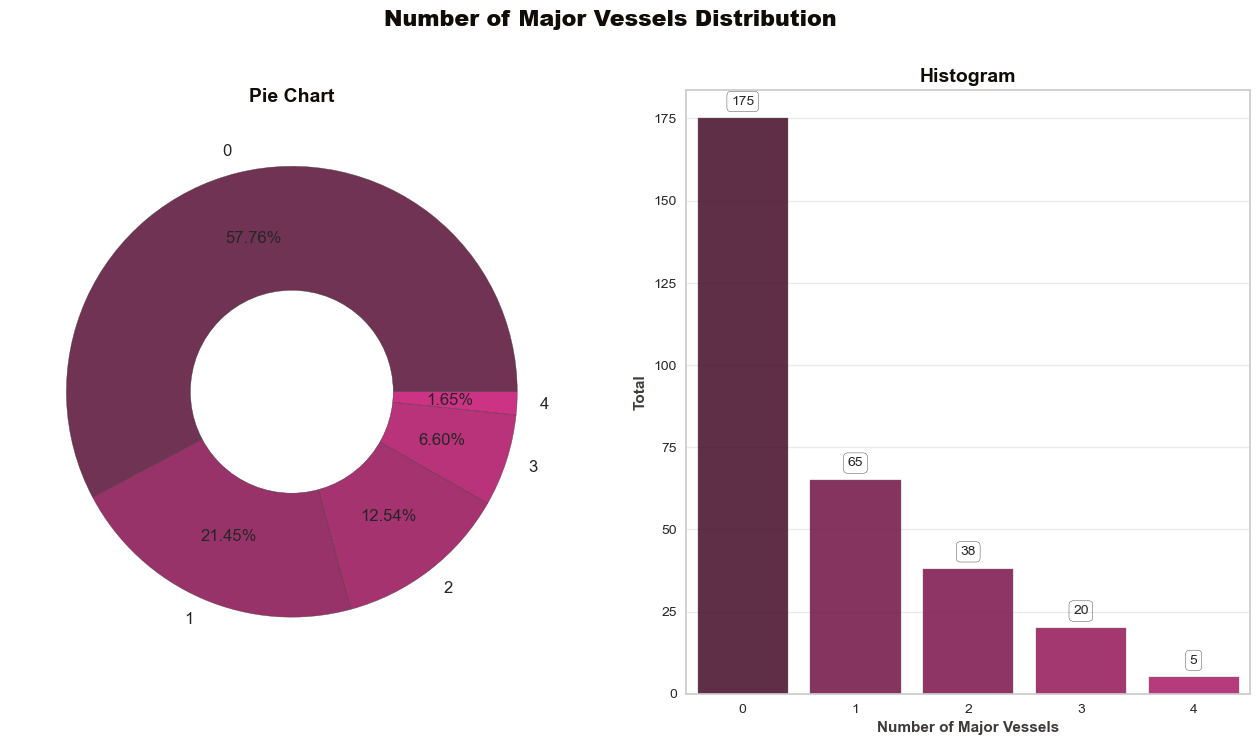

In [16]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>People with 0 major vessel has the highest distribution</b></mark> compared to others.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.8 | thal</div>

********************
.: "thal" Total :.
********************


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

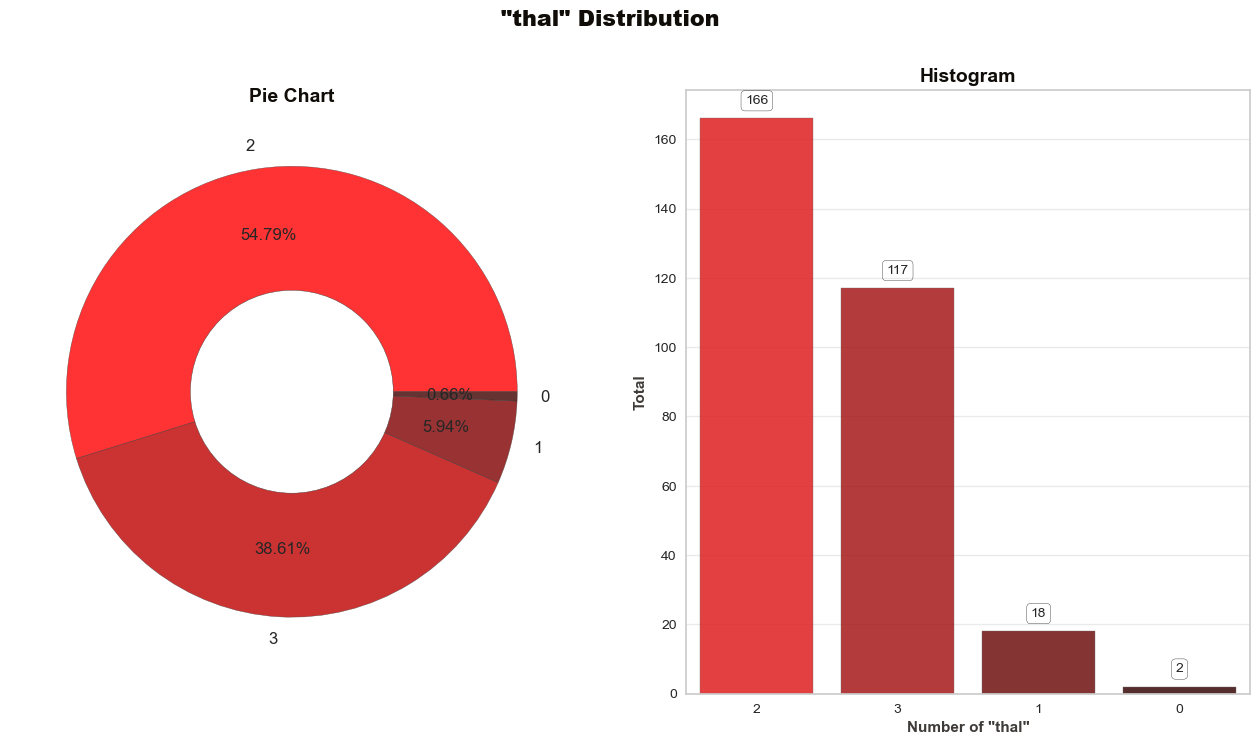

In [17]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>Patients with 2 "thal" has the highest distribution</b></mark> compared to others.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.9 | target (Heart Diseases Status)</div>

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    165
0    138
Name: target, dtype: int64

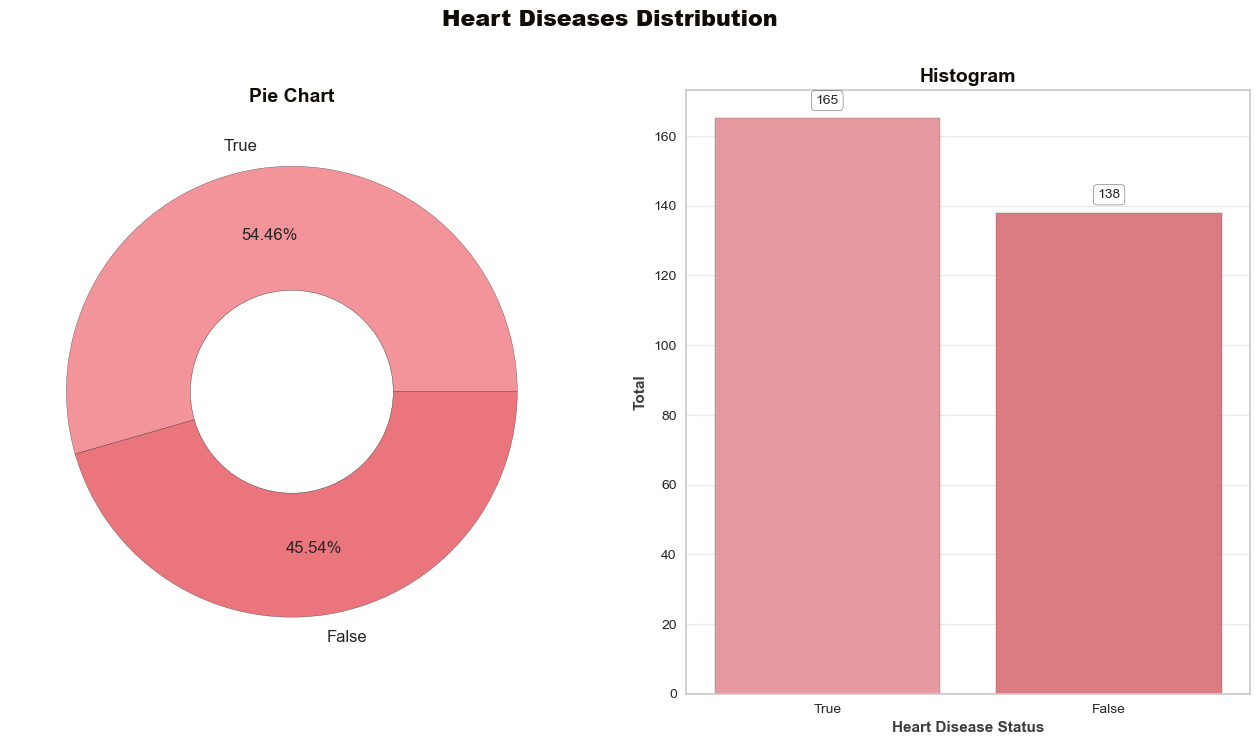

In [18]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The total number of <mark><b>patients that have heart diseases are higher</b></mark> than patients that have no heart diseases.
</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2 | Numerical Variable 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>numerical variable</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2.1 | Descriptive Statistics 📏</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>descriptive statistics</b> of numerical variables.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [19]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000
target,303.000000,0.544554,0.498835,0.000000,0.000000,1.000000,1.000000,1.000000


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the descriptive statistics, it can be seen that <mark><b>age and oldpeak are lack of variation</b></mark>.
    <blockquote style="font-size: 12px; color: #000000;">
        📌 <mark><b>Low standard deviation</b></mark> means data are <mark><b>clustered around the mean</b></mark> (lack of variation), and high standard deviation indicates data are more spread out (more variation).
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2.2 | Continuous Column Distribution 📈</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show the <b>distribution of numerical variables</b> in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.
</div>

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5.2.2.1 | age (Patient Age) </h4>

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.202
Kurtosis: -0.542




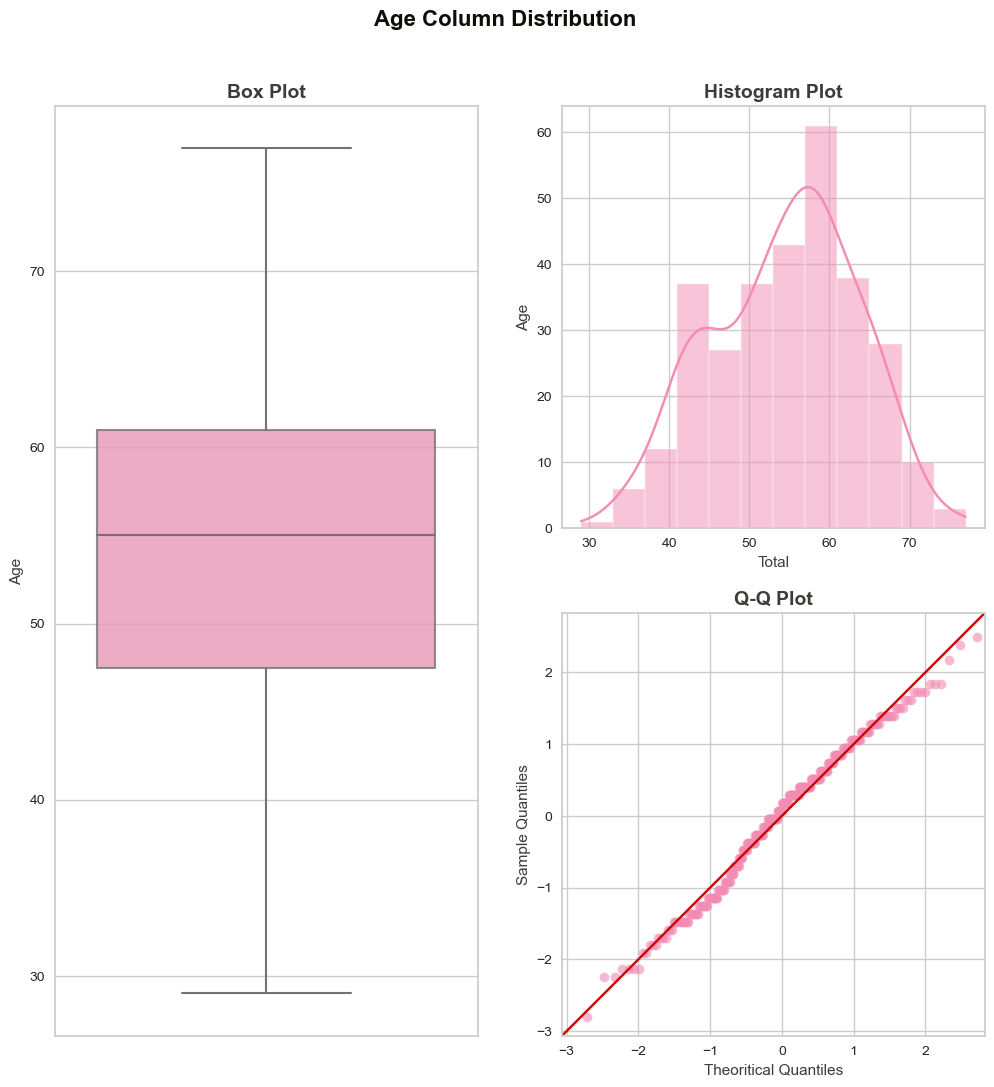

In [20]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the <b>histogram and boxplot</b>, it can be seen that this column is <mark><b>normally distributed</b></mark>. This also proven by <b>skewness value (-0.2)</b> of this column.<br>
    👉 In this column, <b>the kurtosis value is -0.5</b>, which indicates that the column is <mark><b>platikurtic</b></mark>.<br>
    👉 From the Q-Q plot, <b>the data values tend to closely follow the 45-degree</b>, which means the data is likely <mark><b>normally distributed</b></mark> (as stated previously).
    <blockquote style="font-size: 12px; color: #000000;">📌 If skewness is <b>less than -1 or greater than 1</b>, the distribution is <mark><b>highly skewed</b></mark>. If skewness is <b>between -1 and -0.5 or between 0.5 and 1</b>, the distribution is <mark><b>moderately skewed</b></mark>. If skewness is <b>between -0.5 and 0.5</b>, the distribution is <mark><b>approximately symmetric</b></mark>.
    </blockquote>
    <blockquote style="font-size: 12px; color: #000000;">📌 <mark><b>Kurtosis</b></mark> values used to show <mark><b>tailedness of a column</b></mark>. The value of normal distribution (mesokurtotic) should be equal to 3. If kurtosis value is more than 3, it is called leptokurtic. Meanwhile, if kurtosis value is less than 3, then it is called platikurtic.</blockquote>
</div>

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5.2.2.2 | trestbps (Resting Blood Pressure in mm Hg) </h4>

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.714
Kurtosis: 0.929




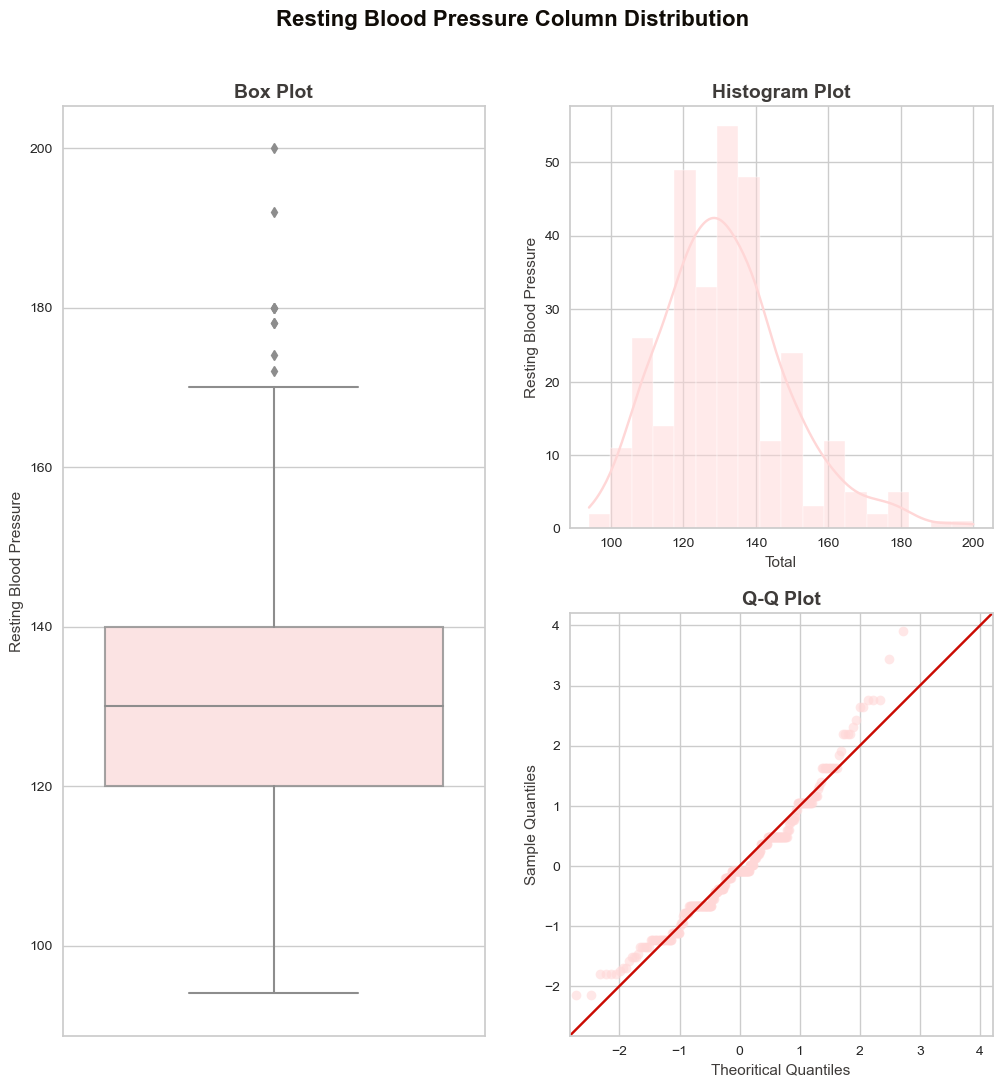

In [21]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the <b>histogram</b>, it can be seen that this column is <mark><b>moderatly right skewed</b></mark>. This also proven by <b>skewness value (0.7)</b> of this column.<br>
    👉 There are some <mark><b>outliers detected</b></mark> at the upper part of boxplot.<br>
    👉 At the upper part of Q-Q plot, <b>the data values tend to move away from 45-degree</b> (there is a gap at upper part of Q-Q plot with 45-degree line), which means the data is likely <mark><b>moderatly right skewed</b></mark> (as stated previously).<br>
    👉 In this column, <b>the kurtosis value is 0.9</b>, which indicates that the column is <mark><b>platikurtic</b></mark>.<br>
</div>

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5.2.2.3 | chol (Serum Cholestoral in mg/dl) </h4>

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.143
Kurtosis: 4.505




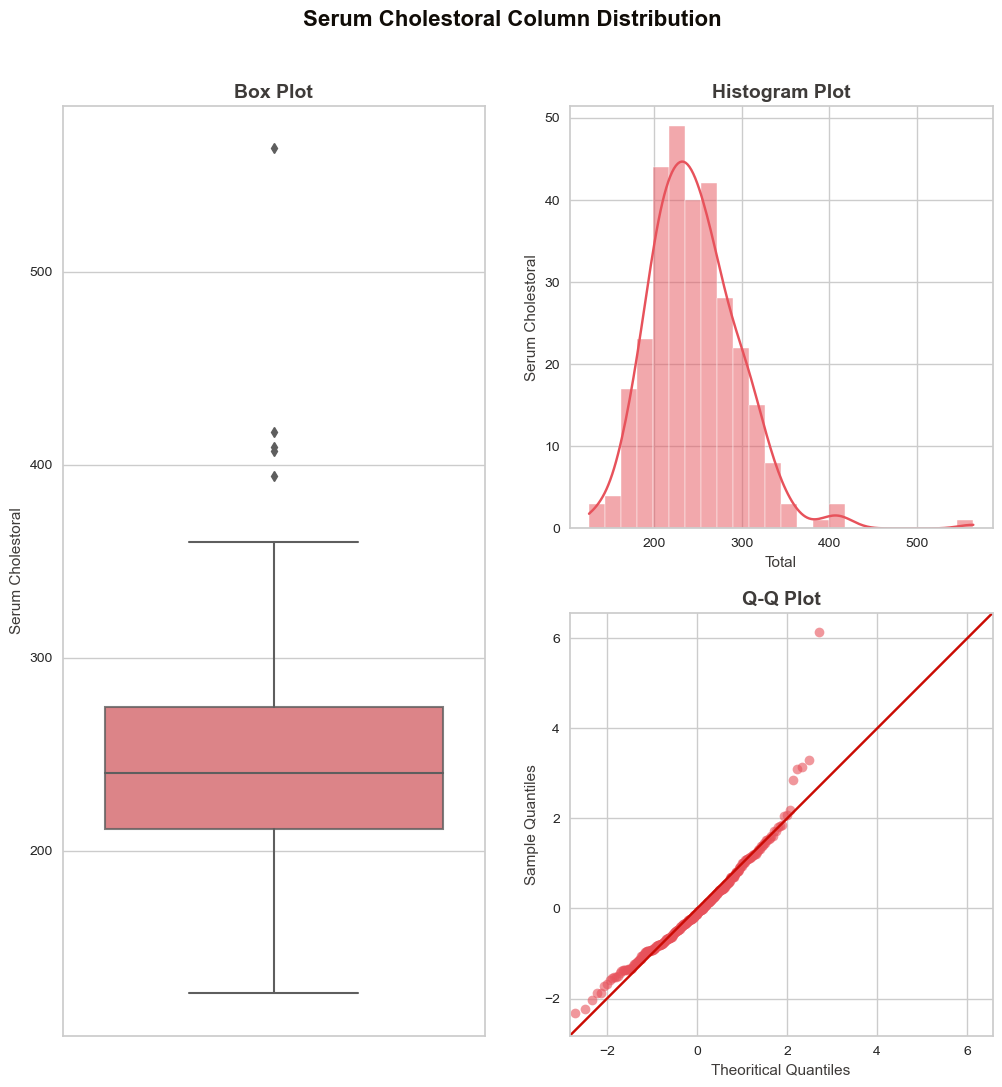

In [22]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the <b>histogram</b>, it can be seen that this column is <mark><b>highly right skewed</b></mark>. This also proven by <b>skewness value (1.1)</b> of this column.<br>
    👉 There are some <mark><b>outliers detected</b></mark> at the upper part of boxplot.<br>
    👉 At the upper part of Q-Q plot, <b>there is a gap at upper part of Q-Q plot with 45-degree line</b>, which means the data is likely <mark><b>highly right skewed</b></mark> (as stated previously).<br>
    👉 In this column, <b>the kurtosis value is 4.5</b>, which indicates that the column is <mark><b>leptokurtic</b></mark>.<br>
</div>

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5.2.2.4 | thalach (Maximum Heart Rate) </h4>

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.537
Kurtosis: -0.062




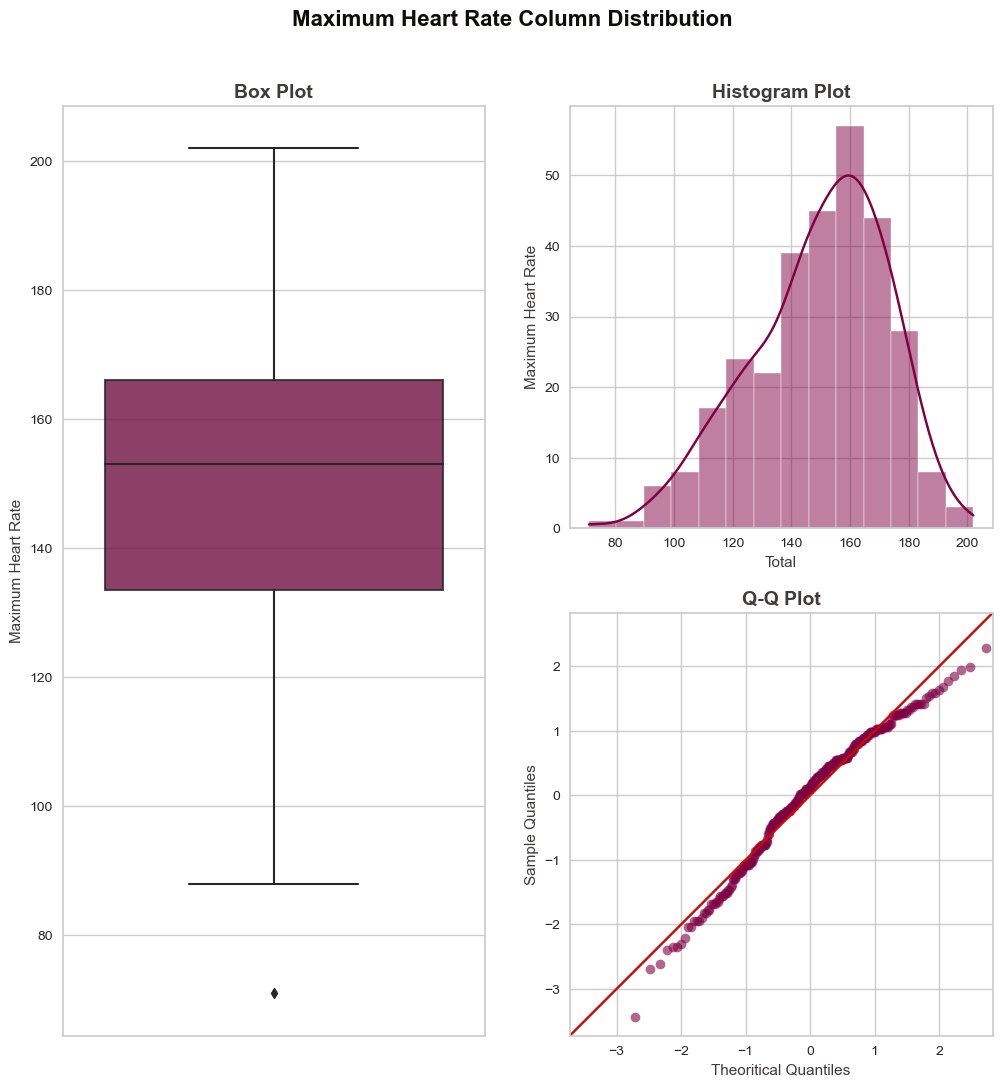

In [23]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the <b>histogram</b>, it can be seen that this column is <mark><b>moderatly left skewed</b></mark>. This also proven by <b>skewness value (-0.5)</b> of this column.<br>
    👉 There is <mark><b>an outlier detected</b></mark> at the bottom part of boxplot.<br>
    👉 At the upper part of Q-Q plot, <b>there is a gap at bottom part of Q-Q plot with 45-degree line</b>, which means the data is likely <mark><b>moderatly left skewed</b></mark> (as stated previously).<br>
    👉 In this column, <b>the kurtosis value is -0.06</b>, which indicates that the column is <mark><b>platikurtic</b></mark>.<br>
</div>

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5.2.2.5 | oldpeak </h4>

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.270
Kurtosis: 1.576




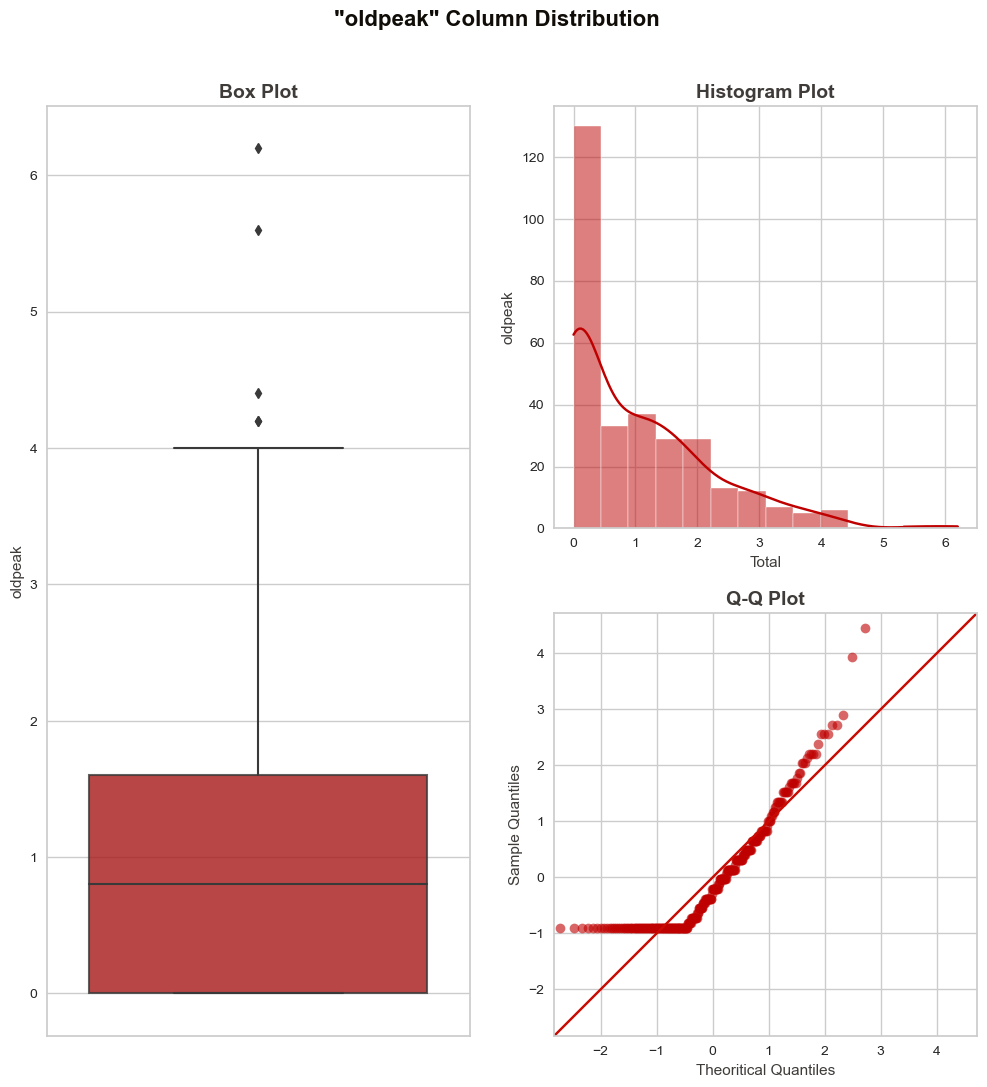

In [24]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the <b>histogram</b>, it can be seen that this column is <mark><b>highly right skewed</b></mark>. This also proven by <b>skewness value (1.3)</b> of this column.<br>
    👉 There are <mark><b>some outliers detected</b></mark> at the upper part of boxplot.<br>
    👉 At the upper part of Q-Q plot, <b>there is a gap at bottom part of Q-Q plot with 45-degree line</b>, which means the data is likely <mark><b>highly right skewed</b></mark> (as stated previously).<br>
    👉 In this column, <b>the kurtosis value is 1.57</b>, which indicates that the column is <mark><b>platikurtic</b></mark>.<br>
</div>

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">6. | EDA 📉</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform some <b>EDA</b> to get more insights about dataset.
</div>

<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.1 | Heart Disease Distribution based on Gender 💉👫</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on gender.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

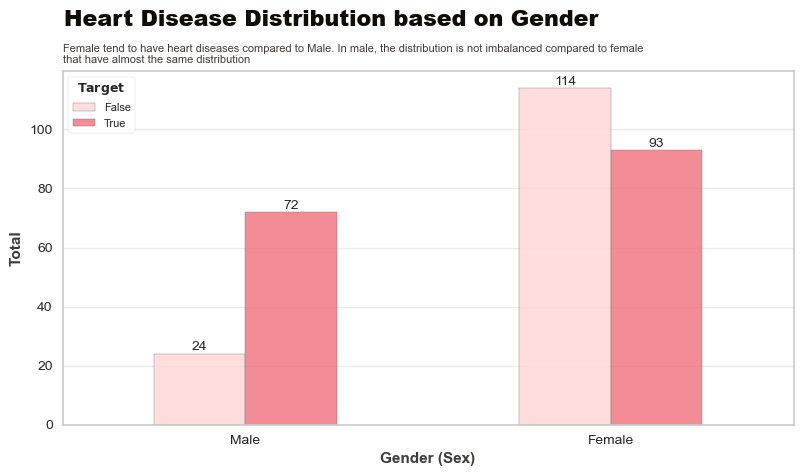

In [25]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2 | Heart Disease Distribution based on Major Vessels Total 💉💖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on number of major vessels.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

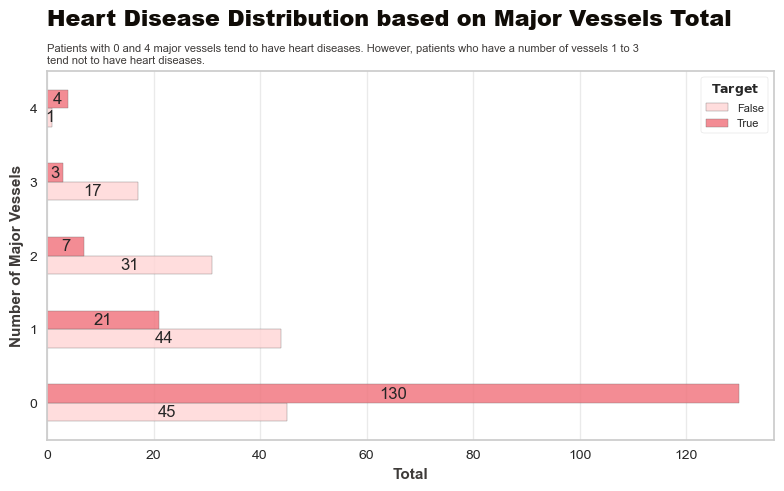

In [26]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.3 | Heart Disease Scatter Plot based on Age 💉👴</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show <b>scatter plot</b> of patients with heart diseases based on age.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

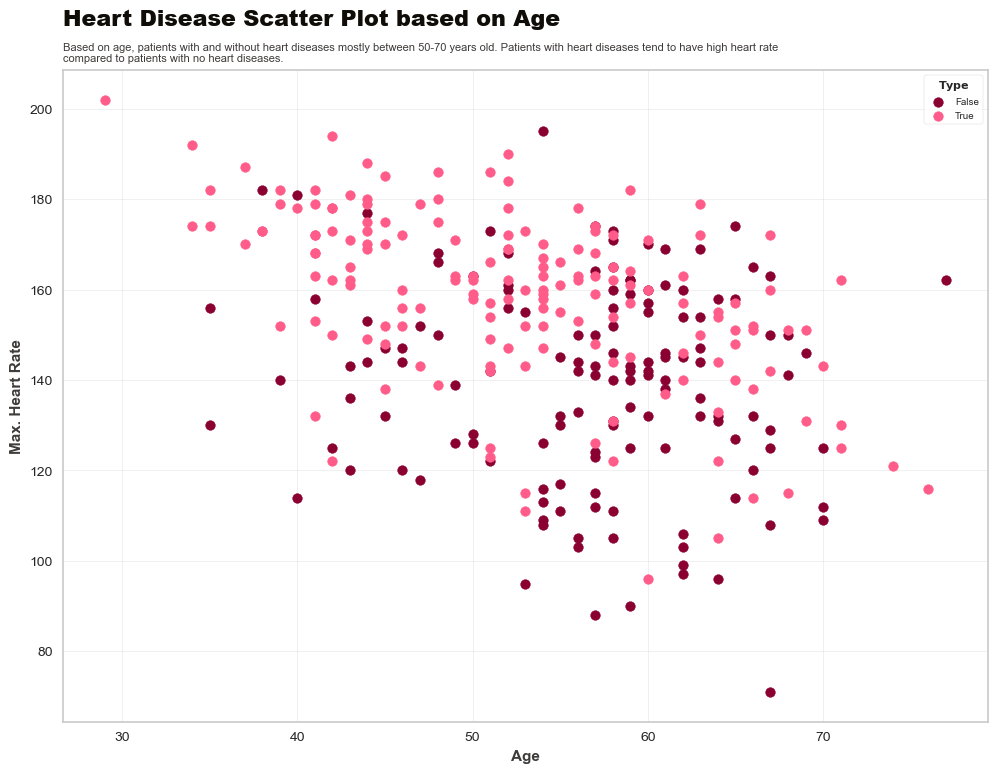

In [27]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c=pink_grad[0])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c=pink_grad[2])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.4 | Chest Pain Type based on Age 😷👴</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show <b>violin plot</b> about age distribution based on chest pain type.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

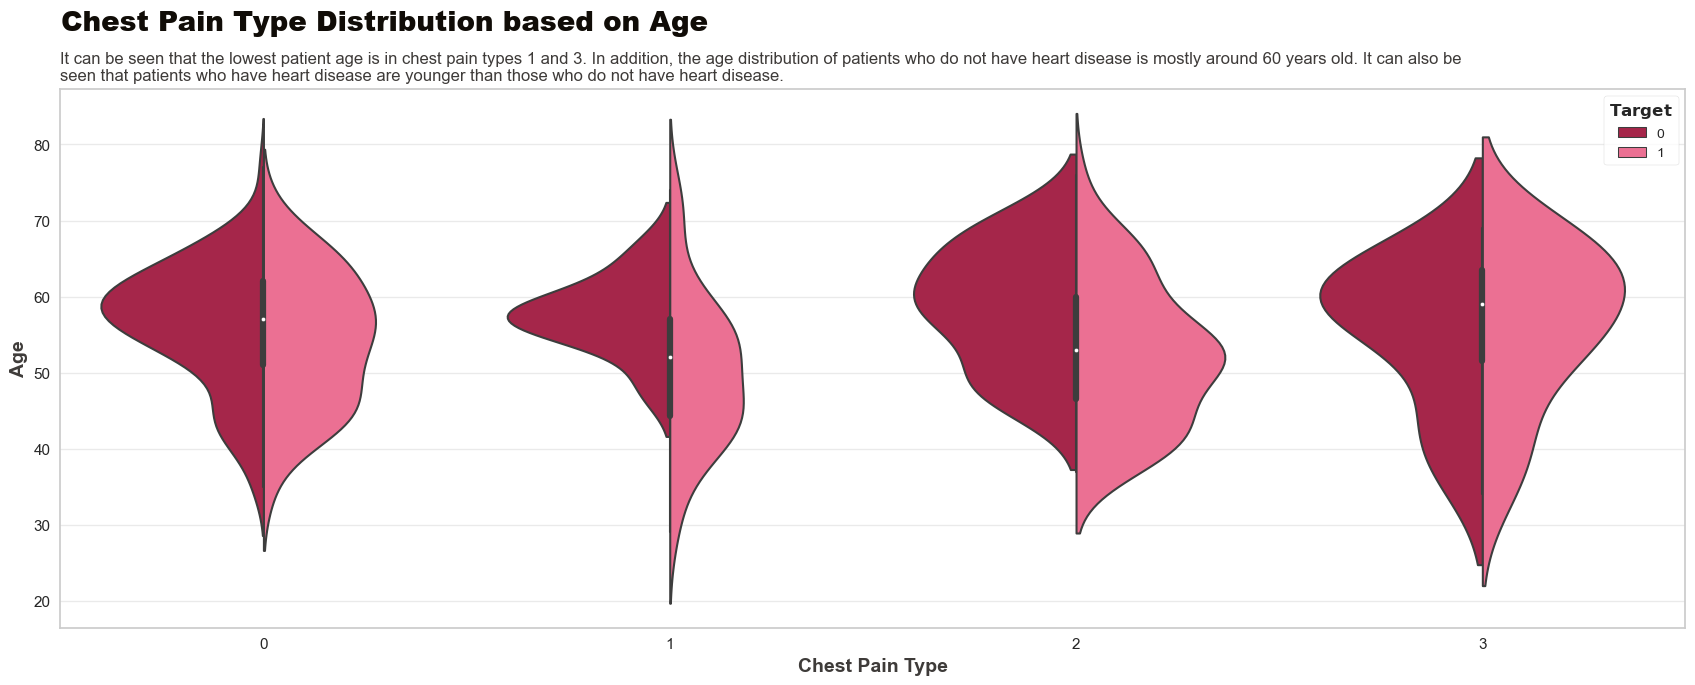

In [28]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('It can be seen that the lowest patient age is in chest pain types 1 and 3. In addition, the age distribution of patients who do not have heart disease is mostly around 60 years old. It can also be\nseen that patients who have heart disease are younger than those who do not have heart disease.', 
          fontsize='12', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Violin Plot based on Type ---
sns.violinplot(x='cp', y='age', hue='target', data=df, ax=ax, 
               palette=pink_grad[1:3], boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.5 | Heart Disease Distribution based on Fasting Blood Sugar 💉🩸</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution on <b>stacked bar chart</b> based on fasting blood sugar.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

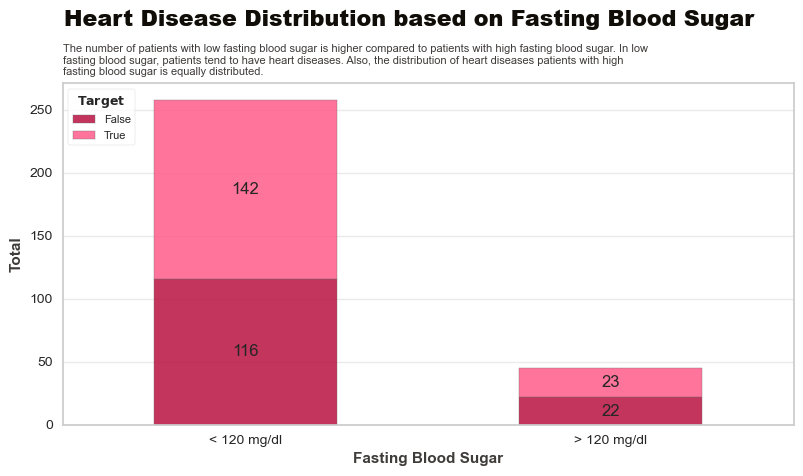

In [29]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5), 
                                         color=pink_grad[1:3], stacked=True,
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.6 | Heatmap 🔥</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Below is <b>correlation map/heatmap of numerical variables</b> to show correlation level/values for each variables with others.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

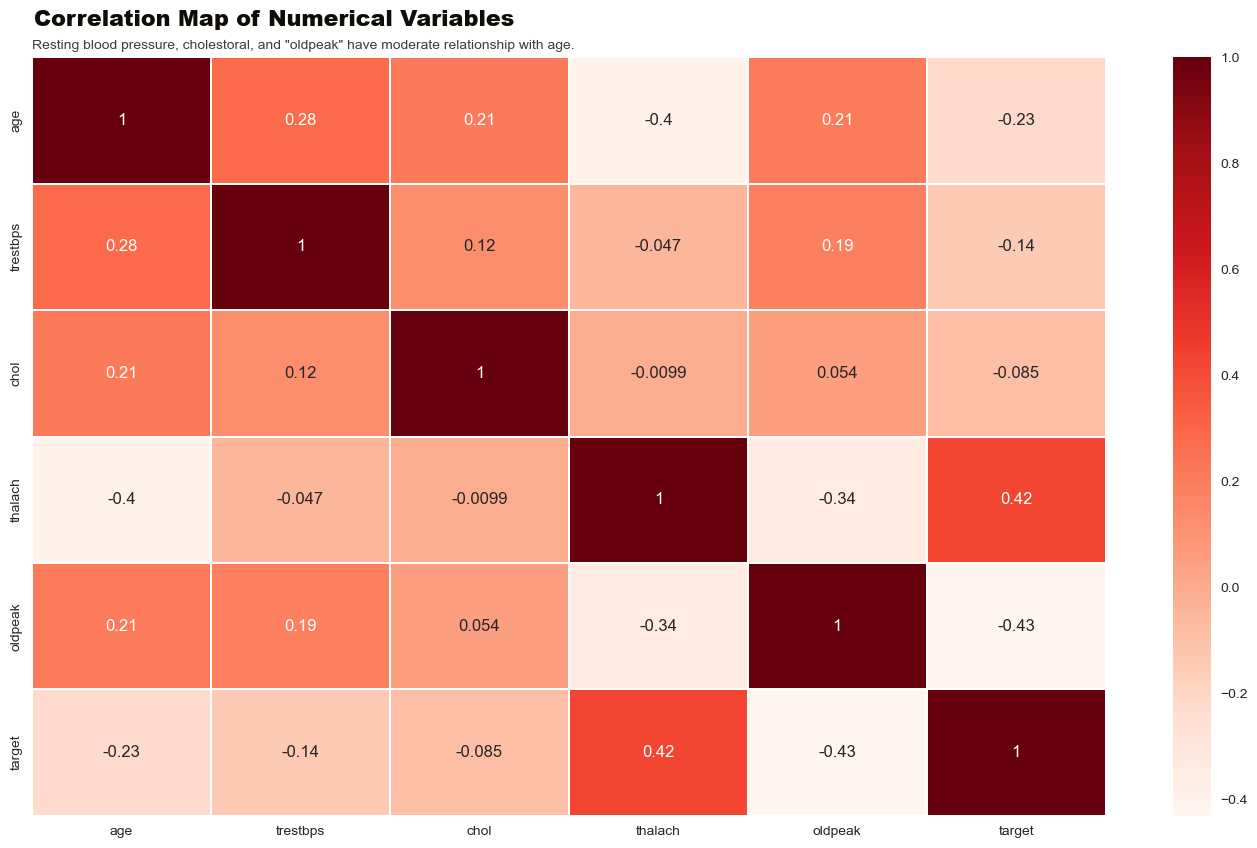

In [30]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">7. | Dataset Pre-processing ⚙</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>prepare the dataset</b> before building the machine learning models.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.1 | One-Hot Encoding 🔧</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The data pre-processing will be transforming categorical variables using <b>one-hot encoding technique</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [31]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [32]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After creating dummy variables, <b>there are some unnecessary variables in the dataframe</b>. <mark><b>These variables will be dropped</b></mark> in the next part.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.2 | Dropping Unnecessary Variables 🔻 </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The <b>variables that unnecessary will be deleted</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [33]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [34]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,145,233,1,0,150,0,2.300000,0,1,0,0,0,1,0,1,0,0,1,0,0
37,1,130,250,0,1,187,0,3.500000,0,1,0,0,1,0,0,0,1,0,1,0,0
41,0,130,204,0,0,172,0,1.400000,0,1,0,1,0,0,0,0,1,0,0,0,1
56,1,120,236,0,1,178,0,0.800000,0,1,0,1,0,0,0,0,1,0,0,0,1
57,0,120,354,0,1,163,1,0.600000,0,1,1,0,0,0,0,0,1,0,0,0,1


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.3 | Features Separating ➗</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In this section, <mark><b>the 'target' (dependent) column will be seperated</b></mark> from independent columns.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [35]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1)
y = df['target']

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.4 | Data Normalization ⚖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In this section, data normalization will be performed to <mark><b>normalize the range of independent variables</b></mark> or features of data.<br>
    👉 Data normalization will use <mark><b>min-max normalization</b></mark>.
    <blockquote style="font-size: 12px; color: #000000;">
    📌 <b>Min-max normalization</b> is often known as feature scaling where <mark><b>the values of a numeric range of a feature of data, are reduced to a scale between 0 and 1</b></mark>.
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [36]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.5 | Splitting the Dataset 🪓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The dataset will be splitted into <mark><b>80:20 ratio</b></mark> (80% training and 20% testing).
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [37]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">8. | Model Implementation 🛠</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will implement various machine learning models as mentioned in <b>Introduction</b> section. In addition, explanation for each models will be discussed.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">8.1 | Logistic Regression</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Logistic regression</b></mark> is a statistical method that is used for building machine learning models where <b>the dependent variable is dichotomous: i.e. binary</b>. Logistic regression is used to describe data and <b>the relationship between one dependent variable and one or more independent variables</b>. The independent variables can be nominal, ordinal, or of interval type.<br><br>
    The name "logistic regression" is derived from the concept of the logistic function that it uses. <b>The logistic function is also known as the sigmoid function</b>. The value of this logistic function lies between zero and one.<br><br>
    <center>
    <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%"><br>
    <i>🖼 Logistic Function by Simplilearn</i>
    </center>
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [38]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1)#, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 88.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.97      0.83      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61


.: Performance Evaluation
**************************


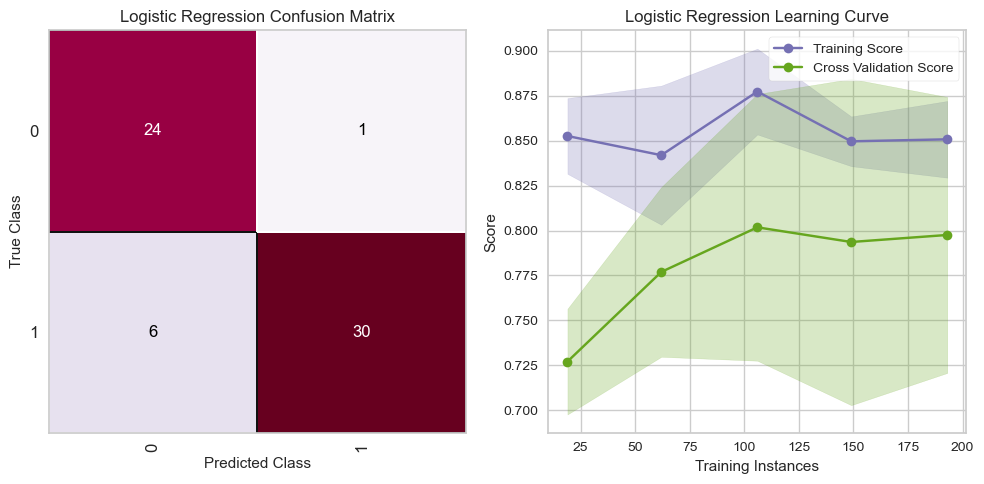

In [39]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax2, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">8.2 | K-Nearest Neighbour (KNN)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>The k-nearest neighbors (KNN)</b></mark> algorithm is a data classification method <b>for estimating the likelihood that a data point will become a member of one group or another</b> based on what group the data points nearest to it belong to.<br><br>
    The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used <b>to solve classification and regression problems</b>.<br><br>
    It's called a <b>lazy learning algorithm or lazy learner</b> because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.</b></mark>.<br><br>
    <center>
    <img src="https://1.bp.blogspot.com/-D6REhf2XBwQ/XZcWn0cwSEI/AAAAAAAAAvs/LUCN8jxvzcMjkkDK4FAXSuR7MBDW8SBJgCLcBGAsYHQ/s1600/KNN_final_a1mrv9.jpg" alt="KNN" width="35%"><br>
    <i>🖼 KNN by Kita Informatika</i>
    </center>
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [40]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 86.89% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61


.: Performance Evaluation
**************************


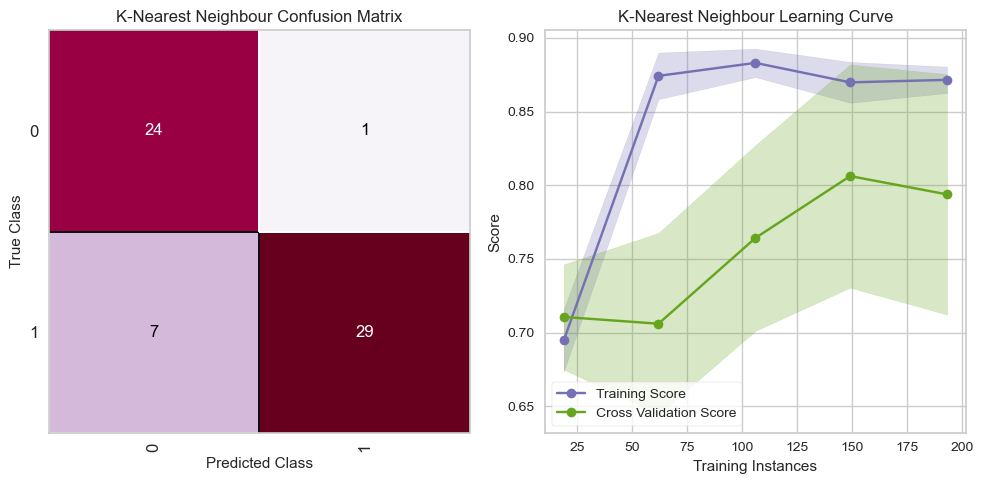

In [41]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax2, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">8.5 | Decision Tree</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Decision Tree</b></mark> is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where <b>internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome</b>.<br><br>
    In a Decision tree, there are <b>two nodes</b>, which are the <mark><b>Decision Node and Leaf Node</b></mark>. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.<br>
    <center>
    <img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" alt="DT" width="35%"><br>
    <i>🖼 Decision Tree by Javatpoint</i>
    </center>
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [42]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 86.89% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61


.: Performance Evaluation
**************************


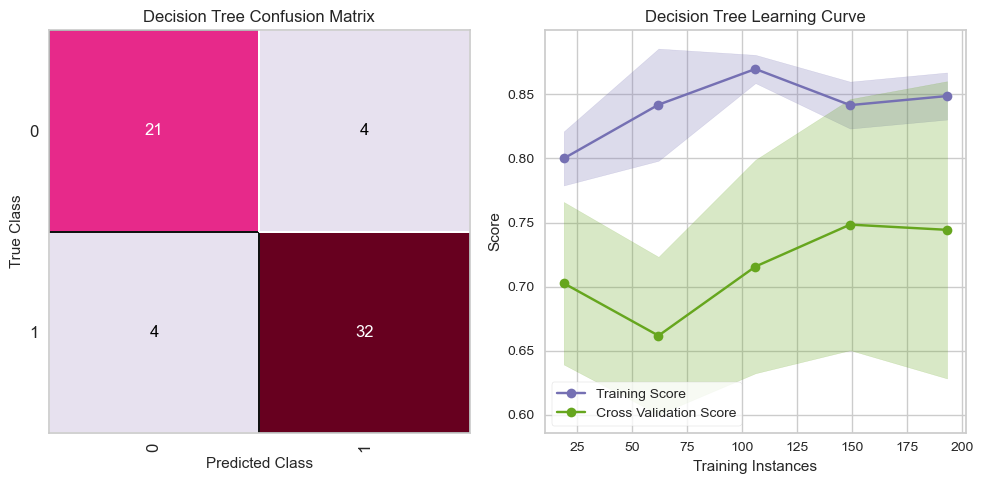

In [43]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax2, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">8.6 | Random Forest</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Random Forest</b></mark> is a tree-based machine learning algorithm that <b>leverages the power of multiple decision trees for making decisions</b>. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. <b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models</b>.<br>
    <center>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" alt="RF" width="35%"><br>
    <i>🖼 Random Forest by Abhishek Sharma</i>
    </center>
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [44]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.97      0.89      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


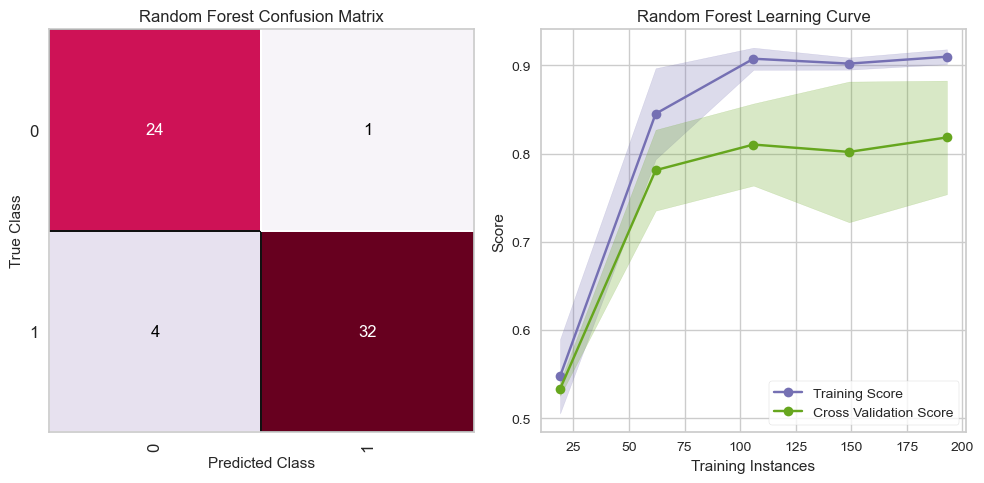

In [45]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">8.9 | AdaBoost</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>AdaBoost</b></mark> also called <b>Adaptive Boosting</b> is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is <b>decision trees with one level</b> that means with Decision trees with only 1 split. These trees are also called <mark><b>Decision Stumps</b></mark>. <b>AdaBoost builds a model and gives equal weights to all the data points</b>. It then assigns higher weights to points that are wrongly classified. Now, all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.
    </blockquote>
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [46]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)

.:. AdaBoost Accuracy: 91.80% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61


.: Performance Evaluation
**************************


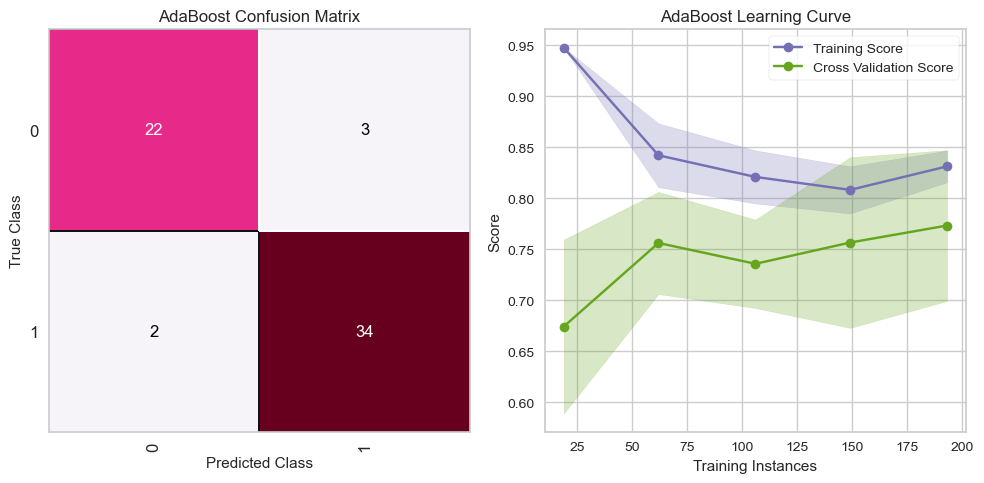

In [47]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax2, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()


plt.tight_layout();

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">8.10 | Model Comparison 👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After implementing 10 models, this section will <b>compare machine learning models</b>.
</div>

In [48]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 
                                  'Decision Tree', 'Random Forest', 'AdaBoost'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, DTCAcc*100, RFAcc*100, ABAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,91.803279
AdaBoost,91.803279
Logistic Regression,88.524590
K-Nearest Neighbour,86.885246
Decision Tree,86.885246


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the results, it can be seen that <b><mark>gradient boosting</mark> provides better results</b>.
</div>

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">9. | Output 📤</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The next step will <b>make output results in csv file</b>. In addition, this section will also <b>export the best model into pickle (.pkl) file</b>.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.1 | Text File 📄</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The dataset that will be extracted into text (<code>.csv</code>) file <b>shaped as follows</b>.
</div>

In [49]:
# --- Transform Test Set & Prediction into New Data Frame ---
test = pd.DataFrame(x_test, columns=['age_scaled', 'sex', 'trestbps_scaled', 
                                     'chol_scaled', 'fbs', 'restecg_scaled', 
                                     'thalach_scaled', 'exang', 'oldpeak_scaled', 
                                     'ca_scaled', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 
                                     'thal_0', 'thal_1', 'thal_2', 'thal_3',
                                     'slope_0', 'slope_1', 'slope_2'])
pred = pd.DataFrame(y_pred_RF, columns=['target'])
prediction = pd.concat([test, pred], axis=1, join='inner')

# --- Transforming 'cp' Column ---
prediction['cp_0'] = prediction['cp_0'].replace([1, 0],['0',''])
prediction['cp_1'] = prediction['cp_1'].replace([1, 0],['1', ''])
prediction['cp_2'] = prediction['cp_2'].replace([1, 0],['2', ''])
prediction['cp_3'] = prediction['cp_3'].replace([1, 0],['3', ''])

prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_1'], prediction['cp_0'])
prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_2'], prediction['cp_0'])
prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_3'], prediction['cp_0'])

# --- Transforming 'thal' Column ---
prediction['thal_0'] = prediction['thal_0'].replace([1, 0],['0',''])
prediction['thal_1'] = prediction['thal_1'].replace([1, 0],['1', ''])
prediction['thal_2'] = prediction['thal_2'].replace([1, 0],['2', ''])
prediction['thal_3'] = prediction['thal_3'].replace([1, 0],['3', ''])

prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_1'], prediction['thal_0'])
prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_2'], prediction['thal_0'])
prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_3'], prediction['thal_0'])

# --- Transforming 'slope' Column ---
prediction['slope_0'] = prediction['slope_0'].replace([1, 0],['0',''])
prediction['slope_1'] = prediction['slope_1'].replace([1, 0],['1', ''])
prediction['slope_2'] = prediction['slope_2'].replace([1, 0],['2', ''])

prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_1'], prediction['slope_0'])
prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_2'], prediction['slope_0'])

# --- Drop Unnecessary ---
prediction = prediction.drop(['cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3',
                 'slope_1', 'slope_2'], axis = 1)

# --- Rename Column Names ---
new_name = {'cp_0': 'cp', 'thal_0': 'thal', 'slope_0': 'slope'}
prediction.rename(columns=new_name, inplace=True)

# --- Display Prediction Result ---
prediction.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age_scaled,sex,trestbps_scaled,chol_scaled,fbs,restecg_scaled,thalach_scaled,exang,oldpeak_scaled,ca_scaled,cp,thal,slope,target
0.291667,1.000000,0.150943,0.194064,0.000000,0.500000,0.687023,0.000000,0.000000,0.000000,0,3,2,0
0.833333,1.000000,0.433962,0.292237,0.000000,0.000000,0.572519,0.000000,0.322581,0.750000,2,3,1,0
0.291667,1.000000,0.528302,0.276256,0.000000,0.500000,0.763359,0.000000,0.241935,0.000000,0,2,2,1
0.270833,0.000000,0.245283,0.189498,0.000000,0.500000,0.778626,0.000000,0.000000,0.000000,2,2,1,1
0.333333,1.000000,0.150943,0.315068,0.000000,0.500000,0.465649,0.000000,0.193548,0.000000,3,3,1,0


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After that, the code below will export the table displayed above into text (<code>.csv</code>) file.
</div>

In [50]:
# --- Export Prediction Result into csv File ---
prediction.to_csv('prediction_heart_disease_RF.csv', index=False)

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.2 | Pickle File 🥒</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>export the best models</b> into pickle (<code>.pkl</code>) file.
</div>

In [51]:
# --- Export Pickle File ---
file = open('heart_disease_RF.pkl', 'wb')
pickle.dump(RFclassifier, file)

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">10. | Prediction Case 🧪</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 For example, there is <b>new patient data</b> that is not available in the dataset. It is <b>required to predict if this new patient has heart disease/not</b>. The patient data are as follows.
    <blockquote style="color: #000000;">
      <ul>
        <li>age (<i>scaled</i>) &emsp;&emsp;&emsp;: <b>0.254</b></li>
        <li>sex &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: <b>Female (1)</b></li>
        <li>trestbps (<i>scaled</i>) &emsp;: <b>0.487</b></li>
        <li>chol (<i>scaled</i>) &emsp;&emsp;&ensp;&nbsp;: <b>0.362</b></li>
        <li>fbs &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;: <b>> 120 mg/dl (1)</b></li>
        <li>restecg (<i>scaled</i>) &emsp;&nbsp;: <b>0.5</b></li>
        <li>thalach (<i>scaled</i>) &emsp;&nbsp;: <b>0.641</b></li>
        <li>exang &emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>1</b></li>
        <li>oldpeak (<i>scaled</i>) &emsp;: <b>0.672</b></li>
        <li>ca (<i>scaled</i>) &emsp;&emsp;&emsp;&nbsp;&nbsp;: <b>0.863</b></li>
        <li>cp &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: <b>3</b></li>
        <li>thal &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;: <b>3</b></li>
        <li>slope &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: <b>1</b></li>
      </ul>
    </blockquote>
</div>

In [52]:
# --- Turn Information into List ---
data = [[0.254, 1, 0.487, 0.362,   ## age_scaled, sex, trestbps_scaled, chol
         1, 0.5, 0.641, 1,         ## fbs, restecg_scaled, thalach_scaled, exang
         0.672, 0.863, 0, 0,       ## oldpeak_scaled, ca_scaled, cp_0, cp_1
         0, 1, 0, 0,               ## cp_2, cp_3, thal_0, thal_1
         0, 1, 0, 1, 0]]           ## thal_2, thal_3, slope_0, slope_1, slope_2

# --- Prediction using Gradient Boosting ---
result = RFclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m')

.:. Heart Disease Not Detected!.:.


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From prediction using best model, it can be seen that the new patient is <b><mark>healthy</mark> (no heart disease detected)</b>.
</div>

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">11. | References 🔗</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <ul style="font-size: 16px; color: #000000"><b><u>Kaggle Notebook 📚</u></b>
        <li><a style="color: #FF5C8A" href="https://www.kaggle.com/vivek468/what-visualizations-should-you-use">What Visualizations Should You Use? by Vivek Chowdhury</a></li>
        <li><a style="color: #FF5C8A" href="https://www.kaggle.com/code/sonalisingh1411/eda-on-train-test-dataset-price-prediction">EDA On Train & Test Dataset+🏡 Price💸Prediction🤔 by Sonali Singh</a></li>
        <li><a style="color: #FF5C8A" href="https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning">Heart Disease - Classifications (Machine Learning) by Caner Dabakoglu</a></li>
        <li><a style="color: #FF5C8A" href="https://www.kaggle.com/code/asimislam/heart-disease-uci-eda-and-ml-w-lr">Heart Disease UCI - EDA and ML w/LR by Asim Islam</a></li>
        <li><a style="color: #FF5C8A" href="https://www.kaggle.com/code/kellibelcher/heart-disease-predictions-with-shapley">Heart Disease Predictions with Shapley by Kelli Belcher</a></li>
    </ul>
    <ul style="font-size: 16px; color: #000000"><b><u>Online Articles 🌏</u></b>
      <li><a style="color: #FF5C8A" href="https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python">An Introduction to Logistic Regression in Python by Simplilearn</a></li>
      <li><a style="color: #FF5C8A" href="https://learn.g2.com/k-nearest-neighbor">What Is K-Nearest Neighbor? An ML Algorithm to Classify Data by Amal Joby</a></li>
      <li><a style="color: #FF5C8A" href="https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm">Support Vector Machine Algorithm by Javatpoint</a></li>
      <li><a style="color: #FF5C8A" href="https://iq.opengenus.org/gaussian-naive-bayes/">Gaussian Naive Bayes by OpenGenus</a></li>
      <li><a style="color: #FF5C8A" href="https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm">Decision Tree Classification Algorithm by Javatpoint</a></li>
      <li><a style="color: #FF5C8A" href="https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/">Decision Tree vs. Random Forest – Which Algorithm Should you Use? by Abhishek Sharma</a></li>
      <li><a style="color: #FF5C8A" href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Understanding Random Forest by Tony Yiu</a></li>
      <li><a style="color: #FF5C8A" href="https://datascience.eu/machine-learning/gradient-boosting-what-you-need-to-know/">Gradient Boosting – What You Need to Know by Data Science . EU</a></li>
      <li><a style="color: #FF5C8A" href="https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab">Understanding Gradient Boosting Machines by Harshdeep Singh</a></li>
      <li><a style="color: #FF5C8A" href="https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/">AdaBoost Algorithm – A Complete Guide for Beginners by Anshul Saini</a></li>
      <li><a style="color: #FF5C8A" href="https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/">ML | Extra Tree Classifier for Feature Selection by GeeksforGeeks</a></li>
    </ul>
    <ul style="font-size: 16px; color: #000000"><b><u>Journals/Papers 📄</u></b>
      <li><a style="color: #FF5C8A" href="https://www.researchgate.net/publication/345327934_Degradation_state_recognition_of_piston_pump_based_on_ICEEMDAN_and_XGBoost">Degradation state recognition of piston pump based on ICEEMDAN and XGBoost by Rui Guo et al.</a></li>
    </ul>
</div>   
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

<div style="font-family: Segoe UI; line-height: 2; color: #000000;">
<hr>
<center>
<span style="font-size: 14px;">
 
<br>
    <b><i>Source: <a href="https://linktr.ee/caesarmario_">linktr.ee/caesarmario_</a></i></b><br><br>
   
<br><br>
<img src="https://i.imgur.com/qLGcpSt.png" width=80% alt="WM">
</center>
    </div>

In [53]:
!jupyter nbconvert  --no-input --to html heart-disease-eda-prediction.ipynb

[NbConvertApp] Converting notebook heart-disease-eda-prediction.ipynb to html
[NbConvertApp] Writing 2535899 bytes to heart-disease-eda-prediction.html
